In [0]:
!nvidia-smi
!pip install torch==1.2.0 torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

Fri Jan  3 07:12:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import torch
import torchtext
from os import path
import urllib.request
import csv
from progressbar import ProgressBar
import time
from matplotlib import pyplot as plt
import pdb
import re
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
from sklearn import cluster
from sklearn import metrics
!git clone https://github.com/src-d/kmcuda
%cd /content/kmcuda/src
!cmake -DCMAKE_BUILD_TYPE=Release -D CUDA_ARCH=60 -D CUDA_TOOLKIT_ROOT_DIR=/usr/local/cuda-10.1 python version: 3.7 . && make
import numpy
from matplotlib import pyplot
from libKMCUDA import kmeans_cuda


regex = re.compile('[^a-zA-Z ]')
torchtype = {'float32': torch.float32, 'float64': torch.float64}

pbar = ProgressBar()


url='https://thleats-bucket.s3.us-east-2.amazonaws.com/watercolor_data%C2%AD_red_v2.csv'
location = '/content/watercolor_data_redv2.csv'

if path.exists(location):
  print('already downloaded!')
else:
  print('downloading')
  urllib.request.urlretrieve(url,location)

prices=[]
title=[]
tags=[]
description=[]
all_data=[]
all_data_cleaned=[]
tags_and_title=[]
words=[]
views=[]
favs=[]
creation=[]
dummy=0

!pip install nltk
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

with open(location, encoding="utf-8",newline="") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    for row in pbar(readCSV):
        prices.append(row[0])
        views.append(row[1])
        favs.append(row[2])
        creation.append(row[3])
        title.append((regex.sub('',row[4])).split())
        tags.append((regex.sub('',row[5])).split())
        description.append((regex.sub('',row[6])).split())
        all_data.append(title[-1]+tags[-1]+description[-1])
        tags_and_title.append(tags[-1] + tags[-1])
#for things in all_data:
  #seperator=' '
  #test=seperator.join(things)
  #test2=(" ".join(w for w in nltk.wordpunct_tokenize(test) if len(w)>2 and w.lower() in words or not w.isalpha())).lower().split()
  #all_data_cleaned.append(test2)

        #var=row[1][1:]
        #texts.append(var)
        #thing = var.split()
        #for word in thing:
          #if len(word)>2:
            #if not word in words:
              #words.append(word)



fatal: destination path 'kmcuda' already exists and is not an empty directory.
/content/kmcuda/src
-- Configuring done
-- Generating done
-- Build files have been written to: /content/kmcuda/src
[100%] Built target KMCUDA
already downloaded!


- |#                                                | 406 Elapsed Time: 0:00:00

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


| |                                            #  | 40097 Elapsed Time: 0:00:04


In [0]:
tags_title_cleaned=[]
for things in tags_and_title:
  #seperator=' '
  #test=seperator.join(things)
  test2=[]
  for thing in things:
    if len(thing)>2:
      test2.append(thing.lower())
  if len(test2)==0:
    test2='notag'
  tags_title_cleaned.append(test2)

In [0]:

sentences =  tags_title_cleaned
model = Word2Vec(sentences, min_count=1)
def sent_vectorizer(sent, model):
  sent_vec =[]
  numw = 0
  for w in sent:
      try:
          if numw == 0:
              sent_vec = model[w]
          else:
              sent_vec = np.add(sent_vec, model[w])
          numw+=1
      except:
          pass
  return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
  X.append(sent_vectorizer(sentence, model))   


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


2
3
4
5


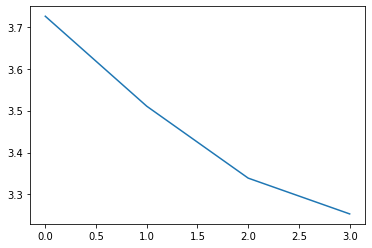

In [0]:
score1=[]
score2=[]

test=np.asarray(X)
embedding_vec=np.asarray(X)
for i in range(2,6):  
  NUM_CLUSTERS=i
  print(str(i))

  centroids, assignments,score = kmeans_cuda(test, NUM_CLUSTERS, verbosity=1, seed=3,average_distance=True)
  score1.append(score)

x = range(len(score1))
plt.plot(x,score1)


In [0]:
NUM_CLUSTERS=3
centroids, assignments,score = kmeans_cuda(test, NUM_CLUSTERS, verbosity=1, seed=3,average_distance=True)
print(score)
prices[0]=2

3.5105843544006348


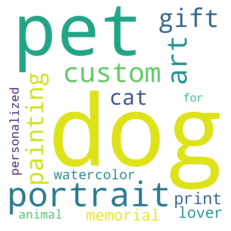

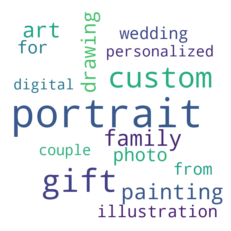

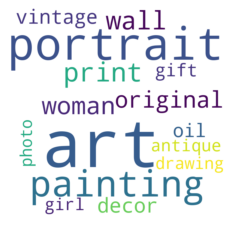

In [0]:
assigned_data=[]
for index, sentence in enumerate(sentences):    
  assigned_data.append([assignments[index],sentence,prices[index],favs[index],views[index],creation[index]])

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
for i in range(NUM_CLUSTERS):
  vector=[]
  for out in assigned_data: 
    cat=out[0]
    val=out[1]
    if cat==i:
      #pdb.set_trace()
      vector.append(val)

  flat_list = [item for sublist in vector for item in sublist]

  word_list = flat_list

  counts = dict(Counter(word_list).most_common(15))

  labels, values = zip(*counts.items())

  import matplotlib.pyplot as plt
  from wordcloud import WordCloud

  wordcloud = WordCloud(background_color='white',width = 800, height = 800,min_font_size = 10)
  wordcloud.generate_from_frequencies(frequencies=counts)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()



In [0]:
#([assignments[index],sentence,price[index],favs[index],views[index],creation[index]])
from scipy import stats
epoch_time = int(time.time())
import torch
import torch.nn as nn
from torch.utils import data

def bin_quantiles(array):
  v1=np.quantile(array,0.66)
  v2=np.quantile(array,0.33)
  idx1=(array>v1)*3
  idx2=((array<=v1) & (array > v2))*2
  idx3=(array<=v2)*1

  idxs=idx1+idx2+idx3
  return(torch.tensor(idxs,dtype=torch.long)-1)



delta=abs(np.asarray([creation],dtype=np.float32)-epoch_time-1)
prices_ = np.asarray([prices],dtype=np.float32)
prices_log = np.log10(prices_)
views_T=np.log10(((np.asarray([views],dtype=np.float32)+1)/delta)*2.628E+6)
favs_T=np.log10(((np.asarray([favs],dtype=np.float32)+1)/delta)*2.628E+6)
views_=(np.asarray([views],dtype=np.float32)+1)
favs_=(np.asarray([favs],dtype=np.float32)+1)
favs_views_T=np.log10((((favs_)/(views_))/delta)*2.628E+6)

views_favs = np.log10(((((favs_T+1)*(views_T+1)))/delta)*2.628E+6)
views_price = np.log10((((views_favs+1)*(prices_log+1))+10))
assignments_np = np.asarray([assignments],dtype=np.float32)
info=[]
embeddings_assigned=[]
for i in range(NUM_CLUSTERS):
  temp=[]
  for k in range(len(X)):
    if assignments[k]==i:
      temp.append(X[k])
  

  temp_prices=prices_log[assignments_np==i]
  temp_views_T=views_T[assignments_np==i]
  temp_favs_T=favs_T[assignments_np==i]
  temp_favs_views_T=favs_views_T[assignments_np==i]
  temp_views_price = views_price[assignments_np==i]
  temp_views_favs = views_favs[assignments_np==i]


  av_price_log = np.average(temp_prices)+5
  av_price = 10**(av_price_log-5)
  av_views = 10**(np.average(temp_views_T))
  av_favs = 10**(np.average(temp_favs_T))
  av_favs_views=10**(np.average(temp_favs_views_T))
  av_views_price=(10**(np.average(temp_views_price)))-10
  av_views_favs=10**(np.average(temp_views_favs))
  count = temp_prices.size

  logit_prices = bin_quantiles(temp_prices)
  logit_views = bin_quantiles(temp_views_T)
  logit_favs = bin_quantiles(temp_favs_T)
  logit_favs_views = bin_quantiles(temp_favs_views_T)
  logit_views_price = bin_quantiles(temp_views_price)
  logit_views_favs = bin_quantiles(temp_views_favs)



  dictionary = {'price':av_price,
                'views':av_views,
                'favs':av_favs,
                'favs_views':av_favs_views,
                'views_price':av_views_price,
                'count':count,
                'views_favs':av_views_favs,
                'embedding':torch.tensor(temp,dtype=torch.float32),
                'prices':torch.tensor(temp_prices,dtype=torch.float32),
                'views_T':torch.tensor(temp_views_T,dtype=torch.float32),
                'favs_T':torch.tensor(temp_favs_T,dtype=torch.float32),
                'favs_views_T':torch.tensor(temp_favs_views_T,dtype=torch.float32),
                'views_price':torch.tensor(temp_views_price,dtype=torch.float32),
                'views_favs':torch.tensor(temp_views_favs,dtype=torch.float32),
                'logit_prices':logit_prices,
                'logit_views_T':logit_views,
                'logit_favs_T':logit_favs,
                'logit_favs_views_T':logit_favs_views,
                'logit_views_price':logit_views_price,
                'logit_views_favs':logit_views_favs}
               
  info.append(dictionary)


  
 

In [0]:
plt.plot(info[0]['views_price'],info[0]['logit_views_price'],'o')

In [0]:

from torch.utils.data.sampler import SubsetRandomSampler

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, embeddings, labels):
        'Initialization'
        self.labels = labels
        self.embeddings = embeddings
        

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.labels)
        #return 100

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        X=self.labels[index]
        Y=self.embeddings[index]
        return(X,Y)

class LinearNetwork(nn.Module):
  def __init__(self):
    super(LinearNetwork,self).__init__()
    in_dim = 100
    out = 3
    self.fc = nn.Linear(in_dim,out)
    self.sigmoid = nn.Sigmoid()
    
  def forward(self,x):
    n,c = x.size()

    flattened = x.view(n, c)
    out = self.sigmoid(self.fc(flattened))
    return (out)

loader = Dataset(info[0]['embedding'],info[0]['logit_views_price'])

batch_size = 1000
validation_split = .15
shuffle_dataset = False
random_seed= 42

dataset_size = len(loader)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]


train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(loader, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(loader, batch_size=batch_size,
                                                sampler=valid_sampler)

In [0]:
import torch.optim as optim
from tqdm import tqdm
model = LinearNetwork()
#objective = torch.nn.MSELoss()
objective =torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3)
epochs=100
losses_t=[]
losses_v=[]
loop = tqdm(total=epochs, position = 0)
for epoch in range(epochs):
  for label,embedding in train_loader:
    y_truth=label.long()
    x=embedding
    y = model(x)
    loss = objective(y,y_truth)
    loss.backward()
    optimizer.step()
    losses_t.append(loss.cpu().item())
    
  with torch.no_grad():
    for label,embedding in validation_loader:
      y_truth=label.long()
      x_v=embedding
      y = model(x_v)
      loss = objective(y,y_truth)
      losses_v.append(loss.cpu().item())
  loop.update(1)
  if epoch%100==0:
    print(losses_t[-1])


In [0]:
plt.figure(0)
plt.plot(losses_v,label='validation')
plt.legend(loc="upper right")
plt.figure(1)
plt.plot(losses_t,label='training')   
plt.legend(loc="upper right")